# KNN Estimator for Banking Segment 

In most of the banks, the clients are segmented into categories. This classification is made by looking into an amount of demographic data. We need to develop a model to, given the demographic and financial data of one client, the model should determine what segment this client is more fit in. 

# The dataset


This dataset is from Kaggle. We can access here on this [link](https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m)





# Importing libreries and the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv('datasets/bank_segmentation_data.csv')
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


On the dataset page on Kaggle we have a description of all the columns on the data set. As you can see here:

1. **CLIENTNUM:** Unique identifier for each customer. (Integer)
2. **Attrition_Flag:**	Flag indicating whether or not the customer has churned out. (Boolean)
3. **Customer_Age:**	Age of customer. (Integer)
4. **Gender:**	Gender of customer. (String)
5. **Dependent_count:**	Number of dependents that customer has. (Integer)
6. **Education_Level:**	Education level of customer. (String)
7. **Marital_Status:**	Marital status of customer. (String)
8. **Income_Category:**	Income category of customer. (String)
9. **Card_Category:**	Type of card held by customer. (String)
10. **Months_on_book:**	How long customer has been on the books. (Integer)
11. **Total_Relationship_Count:**	Total number of relationships customer has with the credit card provider. (Integer)
12. **Months_Inactive_12_mon:**	Number of months customer has been inactive in the last twelve months. (Integer)
13. **Contacts_Count_12_mon:**	Number of contacts customer has had in the last twelve months. (Integer)
14. **Credit_Limit:**	Credit limit of customer. (Integer)
15. **Total_Revolving_Bal:**	Total revolving balance of customer. (Integer)
16. **Avg_Open_To_Buy:**	Average open to buy ratio of customer. (Integer)
17. **Total_Amt_Chng_Q4_Q1:**	Total amount changed from quarter 4 to quarter 1. (Integer)
18. **Total_Trans_Amt:**	Total transaction amount. (Integer)
19. **Total_Trans_Ct:**	Total transaction count. (Integer)
20. **Total_Ct_Chng_Q4_Q1:**	Total count changed from quarter 4 to quarter 1. (Integer)
21. **Avg_Utilization_Ratio:**	Average utilization ratio of customer. (Integer)
22. **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1:**	Naive Bayes classifier for predicting whether or not someone will churn based on characteristics such

Initially, I want to patronize the names of the columns just to be more readable 

In [6]:
maping = {
    'CLIENTNUM': 'Customer_Id',
    'Gender': 'Customer_Gender',
    'Dependent_count': 'Dependent_Count',
    'Month_on_book': 'Monht_on_Book',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'N-B_class_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'N-B_class_2'
}


dataset.rename(columns = maping, inplace = True)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,N-B_class_1,N-B_class_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Exploring the dataset

Now we have patronized the names of the columns we will take a deeper look into the variables we have to work. Mainly the 'Card_Category', which is our target variable

## Card Category

As the Card Category is our target, we start by having a deeper look into this variable. We will first describe this feature.

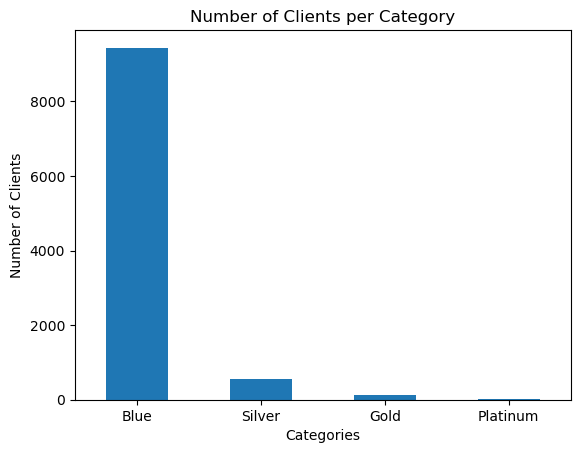

In [7]:
dataset['Card_Category'].value_counts().plot.bar()

plt.xlabel("Categories")
plt.xticks(rotation=0)
plt.ylabel("Number of Clients")
plt.title("Number of Clients per Category")
plt.show()

In [8]:
total = len(dataset)

count_blue = len(dataset.query(" Card_Category == 'Blue' "))
(count_blue/total)*100

93.1766564629209

As we can see we have 4 categories: Blue, Silver, Gold, Platinum<br>
Also, we see that the "Blue" category is the most popular, and the "Platinum" is the least popular. This should indicate that the 'Blue' category is the most demanding one, and the Platinum the most demanding. 

## Age

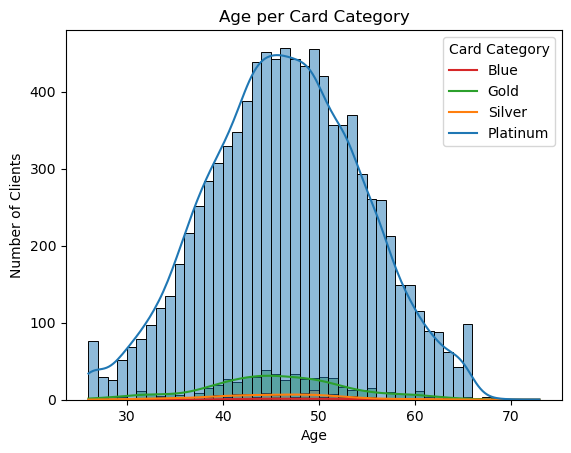

In [9]:
sns.histplot(data = dataset, x = 'Customer_Age', kde=True, hue='Card_Category')
plt.xlabel("Age")
plt.ylabel('Number of Clients')
plt.legend(["Blue", "Gold", "Silver", "Platinum"], title="Card Category")
plt.title("Age per Card Category")
plt.show()

The mean age of the costumers is 46 years old. When we see the curve divided by card category we dont see any big change is distribution. All the card categories has a similar age distribution. The difference in the plot is because we have a lot of 'Blue' clients, so the 'Blue' distribution is higher than the others, but the shape of then is mostly similar to each other.

## Gender

**OBS**: Here we have a problem that is: the dataset is set up only for two genders.<p>
We don't see any other gender that is not: Male or Female. The is no category for transgender or non-binary people to fit in. So, I will use this columns as a feature in the model, but keeping in mid that it is not complete as it should be.

Text(0.5, 1.0, 'Number of Clients per Gender')

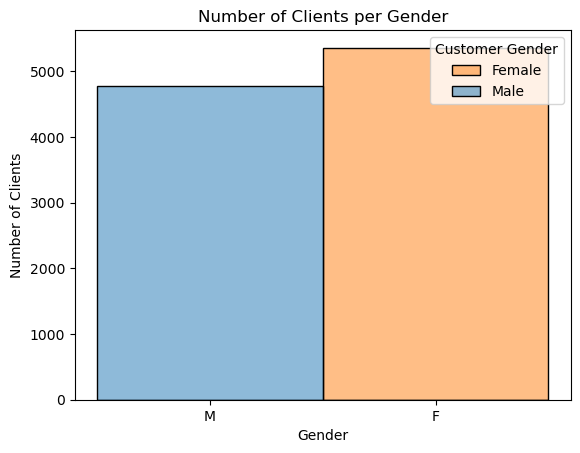

In [10]:
sns.histplot(data = dataset, x = 'Customer_Gender', hue='Customer_Gender')
plt.xlabel("Gender")
plt.ylabel("Number of Clients")
plt.legend(["Female", "Male"], title="Customer Gender")
plt.title("Number of Clients per Gender")

Text(0.5, 1.0, 'Number of Clients per Gender on Blue Category')

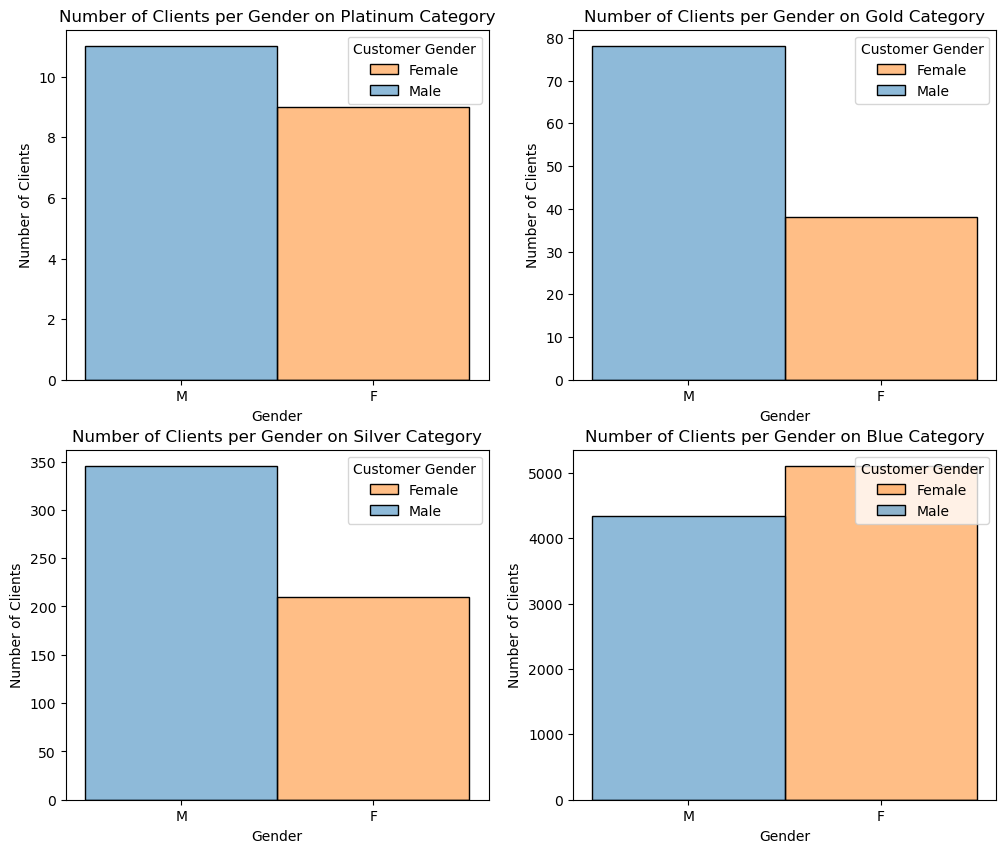

In [11]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.histplot(data = dataset.query("Card_Category == 'Platinum' "), x = 'Customer_Gender', hue='Customer_Gender')
plt.xlabel("Gender")
plt.ylabel("Number of Clients")
plt.legend(["Female", "Male"], title="Customer Gender")
plt.title("Number of Clients per Gender on Platinum Category")

plt.subplot(2,2,2)
sns.histplot(data = dataset.query("Card_Category == 'Gold' "), x = 'Customer_Gender', hue='Customer_Gender')
plt.xlabel("Gender")
plt.ylabel("Number of Clients")
plt.legend(["Female", "Male"], title="Customer Gender")
plt.title("Number of Clients per Gender on Gold Category")

plt.subplot(2,2,3)
sns.histplot(data = dataset.query("Card_Category == 'Silver' "), x = 'Customer_Gender', hue='Customer_Gender')
plt.xlabel("Gender")
plt.ylabel("Number of Clients")
plt.legend(["Female", "Male"], title="Customer Gender")
plt.title("Number of Clients per Gender on Silver Category")

plt.subplot(2,2,4)
sns.histplot(data = dataset.query("Card_Category == 'Blue'"), x = 'Customer_Gender', hue='Customer_Gender')
plt.xlabel("Gender")
plt.ylabel("Number of Clients")
plt.legend(["Female", "Male"], title="Customer Gender")
plt.title("Number of Clients per Gender on Blue Category")

Despite the fact that women are in greater numbers overall, the only category in which they are in the majority is "Blue", which is the most popular. As we move on to the more demanding categories, this scenario changes completely, and men end up being the majority in all categories above "Blue".

## Marital Status

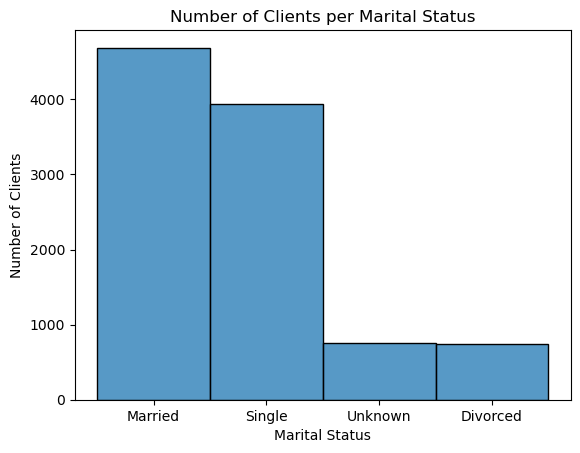

In [12]:
sns.histplot(data = dataset, x = 'Marital_Status')
plt.xlabel("Marital Status")
plt.ylabel("Number of Clients")
plt.title("Number of Clients per Marital Status")
plt.show()

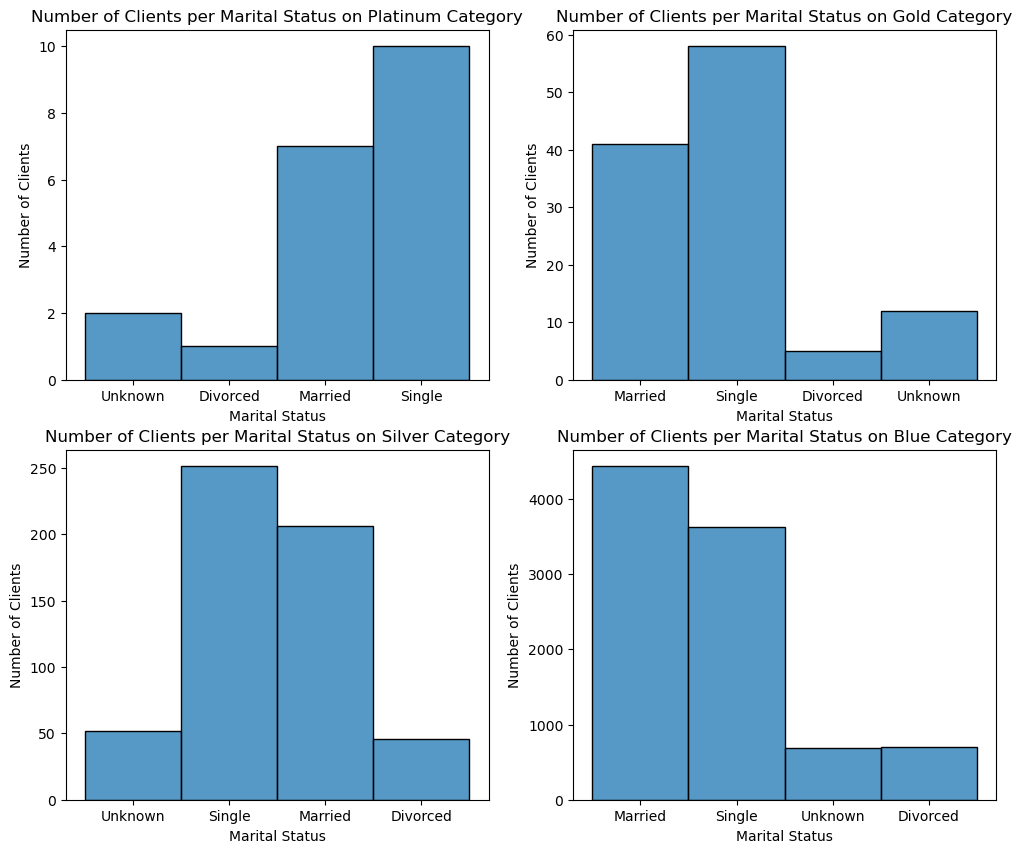

In [13]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.histplot(data = dataset.query("Card_Category == 'Platinum' "), x = 'Marital_Status')
plt.xlabel("Marital Status")
plt.ylabel("Number of Clients")
plt.title("Number of Clients per Marital Status on Platinum Category")

plt.subplot(2,2,2)
sns.histplot(data = dataset.query("Card_Category == 'Gold' "), x = 'Marital_Status')
plt.xlabel("Marital Status")
plt.ylabel("Number of Clients")
plt.title("Number of Clients per Marital Status on Gold Category")


plt.subplot(2,2,3)
sns.histplot(data = dataset.query("Card_Category == 'Silver' "), x = 'Marital_Status')
plt.xlabel("Marital Status")
plt.ylabel("Number of Clients")
plt.title("Number of Clients per Marital Status on Silver Category")

plt.subplot(2,2,4)
sns.histplot(data = dataset.query("Card_Category == 'Blue' "), x = 'Marital_Status')
plt.xlabel("Marital Status")
plt.ylabel("Number of Clients")
plt.title("Number of Clients per Marital Status on Blue Category")

plt.show()

We have some people whose marital status is unknown. I will treat that like any other category in marital status. Because I don't feel like choosing a marital status for them.
The most popular marital status is "Married", but we should look at each card category individually.<p>

We observed the same effect as is gender: although the "Married" status is the most popular in general, when we look at the categories above "Blue" the picture changes a lot. In these cases, the majority are single.  

## Education Level

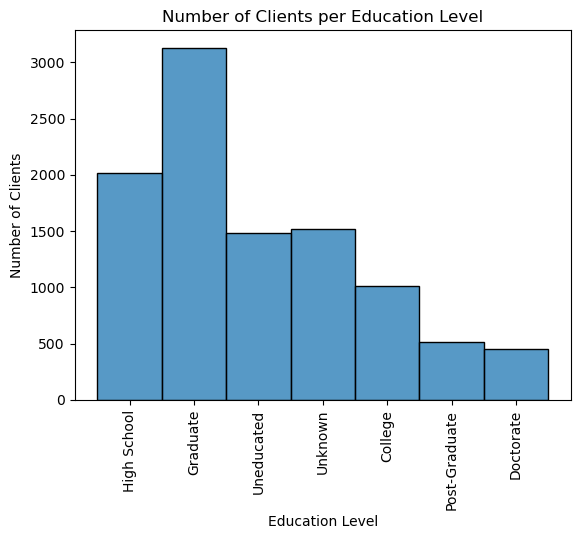

In [14]:
sns.histplot(data = dataset, x = 'Education_Level')
plt.ylabel("Number of Clients")
plt.xlabel("Education Level")
plt.xticks(rotation=90)
plt.title("Number of Clients per Education Level")
plt.show()

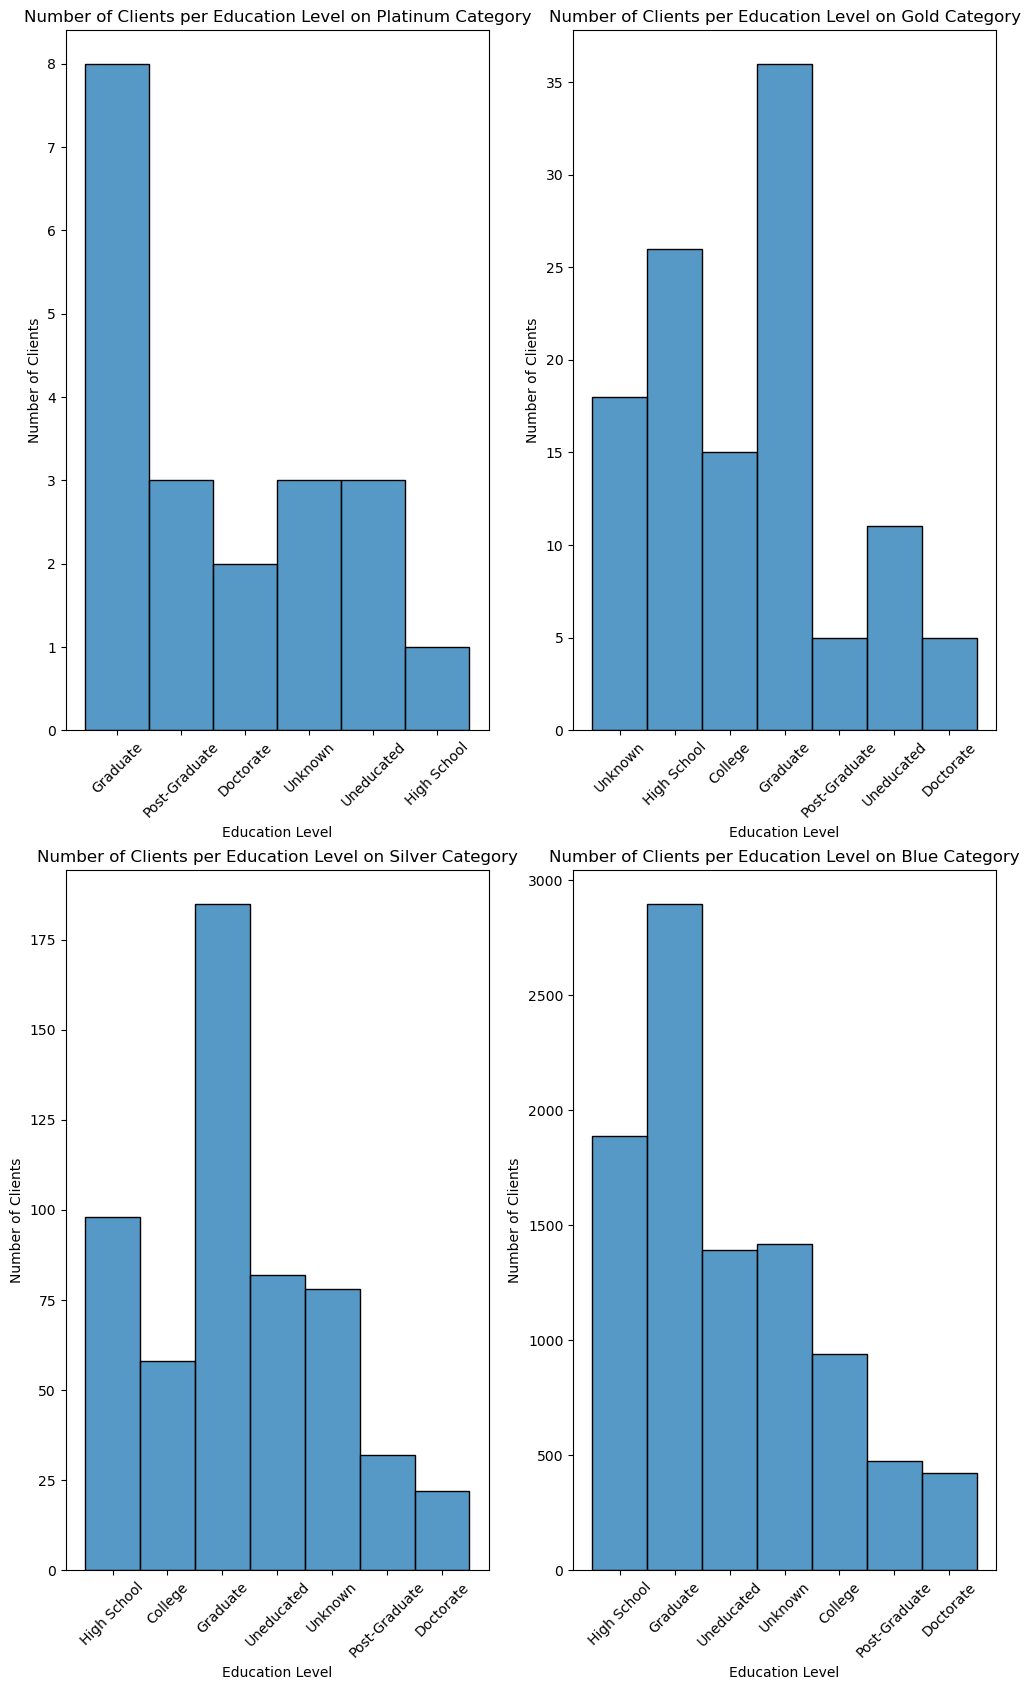

In [15]:
plt.figure(figsize=(12,20))

plt.subplot(2,2,1)
sns.histplot(data = dataset.query("Card_Category == 'Platinum' "), x = 'Education_Level')
plt.xlabel("Education Level")
plt.xticks(rotation=45)
plt.ylabel("Number of Clients")
plt.title("Number of Clients per Education Level on Platinum Category")

plt.subplot(2,2,2)
sns.histplot(data = dataset.query("Card_Category == 'Gold' "), x = 'Education_Level')
plt.xlabel("Education Level")
plt.xticks(rotation=45)
plt.ylabel("Number of Clients")
plt.title("Number of Clients per Education Level on Gold Category")


plt.subplot(2,2,3)
sns.histplot(data = dataset.query("Card_Category == 'Silver' "), x = 'Education_Level')
plt.xlabel("Education Level")
plt.xticks(rotation=45)
plt.ylabel("Number of Clients")
plt.title("Number of Clients per Education Level on Silver Category")

plt.subplot(2,2,4)
sns.histplot(data = dataset.query("Card_Category == 'Blue' "), x = 'Education_Level')
plt.xlabel("Education Level")
plt.xticks(rotation=45)
plt.ylabel("Number of Clients")
plt.title("Number of Clients per Education Level on Blue Category")

plt.show()

In this case, we keep the "Graduate" category as the most popular in general. But as we advance to the less popular categories such as 'Gold' and 'Platinum' the number of 'Post-Graduated' and 'Doctorated' is higher than the 'Silver' and 'Blue' categories.

Now, we have a lot of cool things to explore on this dataset.<p>
Like the difference in income per gender, or education level. Or the credit limit per income, etc. But I will keep working on this kind of stuff in another notebook, here the focus is on developing the KNN Estimator to see if we can presume the card category a person should receive.

# Cleaning and preparing the dataset





First, we will see if there is any null values on the dataset

In [16]:
np.sum(dataset.isna())

Customer_Id                 0
Attrition_Flag              0
Customer_Age                0
Customer_Gender             0
Dependent_Count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
N-B_class_1                 0
N-B_class_2                 0
dtype: int64

Luckily we haven't any NA values

## Categorical Features

Now we need to treat the categorical features.
For that I will use the OneHotEncoder

In [17]:
from sklearn.preprocessing import OneHotEncoder

### Gender

The gender category is easy to treat because we have only 2 categories. So I will just use 1 for male and 0 for female.

In [18]:
gender_map = {
    'M': 1,
    'F': 0
}

dataset['Customer_Gender'] = dataset['Customer_Gender'].map(gender_map)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,N-B_class_1,N-B_class_2
0,768805383,Existing Customer,45,1,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,1,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,0,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Education Level

The education level is an ordinal category, so I will assign it to the 0 up to 6 according to the the education level. And assigning 0 to 'unknown'.

In [19]:
education_level_map = {
        'Unknown'       : 0,
        'Uneducated'    : 1,
        'High School'   : 2,
        'College'       : 3,
        'Graduate'      : 4,
        'Post-Graduate' : 5,
        'Doctorate'     : 6
}

dataset['Education_Level'] = dataset['Education_Level'].map(education_level_map)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,N-B_class_1,N-B_class_2
0,768805383,Existing Customer,45,1,3,2,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,0,5,4,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,1,3,4,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,0,4,2,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,1,3,1,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Incoming Category

The Incoming Category is also an ordinal feature. So I will rate it from 0 up to 6. Just like I did on the Education Level.

In [20]:
incoming_category_map = {
    'Unknown'        : 0,
    'Less than $40K' : 1, 
    '$40K - $60K'    : 2,
    '$60K - $80K'    : 3,
    '$80K - $120K'   : 4,
    '$120K +'        : 5
}

dataset['Income_Category'] = dataset['Income_Category'].map(incoming_category_map)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,N-B_class_1,N-B_class_2
0,768805383,Existing Customer,45,1,3,2,Married,3,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,0,5,4,Single,1,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,1,3,4,Married,4,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,0,4,2,Unknown,1,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,1,3,1,Married,3,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Card Category

 Another ordinal categorical variable, we already know how to handle it.

In [21]:
card_category_map = {
    'Blue'     : 1,
    'Silver'   : 2,
    'Gold'     : 3,
    'Platinum' : 4  
}

dataset['Card_Category'] = dataset['Card_Category'].map(card_category_map)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,N-B_class_1,N-B_class_2
0,768805383,Existing Customer,45,1,3,2,Married,3,1,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,0,5,4,Single,1,1,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,1,3,4,Married,4,1,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,0,4,2,Unknown,1,1,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,1,3,1,Married,3,1,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Marital Status

The marital status is different. We don't have an order, it is a nominal categorical variable. So we will use the 'OneHotEncoder' to fit it into a numerical feature so we can use this on our model.

In [22]:
ohe = OneHotEncoder()

ohe_transformed = pd.DataFrame(ohe.fit_transform(dataset[['Marital_Status']]).toarray())

dataset = dataset.join(ohe_transformed)

In [23]:
dataset.rename(columns = {0: 'Marital_Status_0', 1: 'Marital_Status_1', 2: 'Marital_Status_2', 3: 'Marital_Status_3'}, inplace = True)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,N-B_class_1,N-B_class_2,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3
0,768805383,Existing Customer,45,1,3,2,Married,3,1,39,...,1144,42,1.625,0.061,0.000093,0.99991,0.0,1.0,0.0,0.0
1,818770008,Existing Customer,49,0,5,4,Single,1,1,44,...,1291,33,3.714,0.105,0.000057,0.99994,0.0,0.0,1.0,0.0
2,713982108,Existing Customer,51,1,3,4,Married,4,1,36,...,1887,20,2.333,0.000,0.000021,0.99998,0.0,1.0,0.0,0.0
3,769911858,Existing Customer,40,0,4,2,Unknown,1,1,34,...,1171,20,2.333,0.760,0.000134,0.99987,0.0,0.0,0.0,1.0
4,709106358,Existing Customer,40,1,3,1,Married,3,1,21,...,816,28,2.500,0.000,0.000022,0.99998,0.0,1.0,0.0,0.0


### Attrition Flag

This column is to say if a customer has churned or not. Since we want to categorize the customers in card categories there is no reason to keep the clients that had churned. So we will ignore this column. In another project, we will use this feature to develop a Decision Tree Estimator to estimate the chance of a client churn.

In [24]:
dataset.query(" Attrition_Flag == 'Existing Customer'", inplace = True)

## Numerical Categories 

Now we will treat all the numerical categories with 'StandardScaler'<p>
This is important because we have a lot of numbers and they are not on the same scale. For example: the age and the credit limit are on very different scales which would confuse our model. To avoid that problem we do this step to standardize the scale for all the numerical features. 

In [25]:
from sklearn.preprocessing import StandardScaler

To be more easy to read I will do all the transformations in only one block. 

In [26]:
scaler = StandardScaler().fit(dataset[['Customer_Age']])
dataset['Customer_Age'] = scaler.transform(dataset[['Customer_Age']])

scaler = StandardScaler().fit(dataset[['Dependent_Count']])
dataset['Dependent_Count'] = scaler.transform(dataset[['Dependent_Count']])

scaler = StandardScaler().fit(dataset[['Months_on_book']])
dataset['Months_on_book'] = scaler.transform(dataset[['Months_on_book']])

scaler = StandardScaler().fit(dataset[['Total_Relationship_Count']])
dataset['Total_Relationship_Count'] = scaler.transform(dataset[['Total_Relationship_Count']])

scaler = StandardScaler().fit(dataset[['Months_Inactive_12_mon']])
dataset['Months_Inactive_12_mon'] = scaler.transform(dataset[['Months_Inactive_12_mon']])

scaler = StandardScaler().fit(dataset[['Contacts_Count_12_mon']])
dataset['Contacts_Count_12_mon'] = scaler.transform(dataset[['Contacts_Count_12_mon']])

scaler = StandardScaler().fit(dataset[['Credit_Limit']])
dataset['Credit_Limit'] = scaler.transform(dataset[['Credit_Limit']])

scaler = StandardScaler().fit(dataset[['Total_Revolving_Bal']])
dataset['Total_Revolving_Bal'] = scaler.transform(dataset[['Total_Revolving_Bal']])

scaler = StandardScaler().fit(dataset[['Avg_Open_To_Buy']])
dataset['Avg_Open_To_Buy'] = scaler.transform(dataset[['Avg_Open_To_Buy']])

scaler = StandardScaler().fit(dataset[['Total_Trans_Amt']])
dataset['Total_Trans_Amt'] = scaler.transform(dataset[['Total_Trans_Amt']])

scaler = StandardScaler().fit(dataset[['Total_Trans_Ct']])
dataset['Total_Trans_Ct'] = scaler.transform(dataset[['Total_Trans_Ct']])

scaler = StandardScaler().fit(dataset[['Avg_Utilization_Ratio']])
dataset['Avg_Utilization_Ratio'] = scaler.transform(dataset[['Avg_Utilization_Ratio']])

scaler = StandardScaler().fit(dataset[['N-B_class_1']])
dataset['N-B_class_1'] = scaler.transform(dataset[['N-B_class_1']])

scaler = StandardScaler().fit(dataset[['N-B_class_2']])
dataset['N-B_class_2'] = scaler.transform(dataset[['N-B_class_2']])

# We Ready!

Now our dataset is ready,  we get our hands on the model building.<br>
I will save this preprocessed dataset in the *'datasets'* folder on this project, and focus only on the model building in the *'models'* folder<br>

In [27]:
dataset.to_csv('datasets/preprocessed_dataset.csv')

# Thank You!